In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
import joblib

In [2]:
import pandas as pd

# Load the dataset
file_path = "Indian_House_Prices.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9390 non-null   int64  
 1   Price                9390 non-null   float64
 2   Area                 9390 non-null   int64  
 3   Location             9390 non-null   object 
 4   No. of Bedrooms      9390 non-null   float64
 5   Resale               9390 non-null   int64  
 6   MaintenanceStaff     9390 non-null   float64
 7   Gymnasium            9390 non-null   float64
 8   SwimmingPool         9390 non-null   float64
 9   LandscapedGardens    9390 non-null   float64
 10  JoggingTrack         9390 non-null   float64
 11  RainWaterHarvesting  9390 non-null   float64
 12  IndoorGames          9390 non-null   float64
 13  ShoppingMall         9390 non-null   float64
 14  Intercom             9390 non-null   float64
 15  SportsFacility       9390 non-null   f

In [3]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [4]:
 df.head(3)

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City,Latitude,Longitude
0,0,300.00,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.265594,76.646540
1,1,83.58,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.971319,77.696477
2,2,68.45,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banglore,12.917657,77.483757


In [5]:
#FINDING MISSING VALUES
df.isnull().sum()

Unnamed: 0             0
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [6]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
df.shape

(9390, 44)

In [8]:
df['Price'].describe()

# Since Max	₹4000 lakhs = ₹40 crores & Min	₹20 lakhs , thus column price is estimated to be in lakhs

count    9390.000000
mean      105.614563
std       139.664066
min        20.000000
25%        45.000000
50%        70.000000
75%       122.000000
max      4000.000000
Name: Price, dtype: float64

In [9]:
correlation = df['Area'].corr(df['Price'])
print(f"Correlation between Area and Price: {correlation:.2f}")


Correlation between Area and Price: 0.66


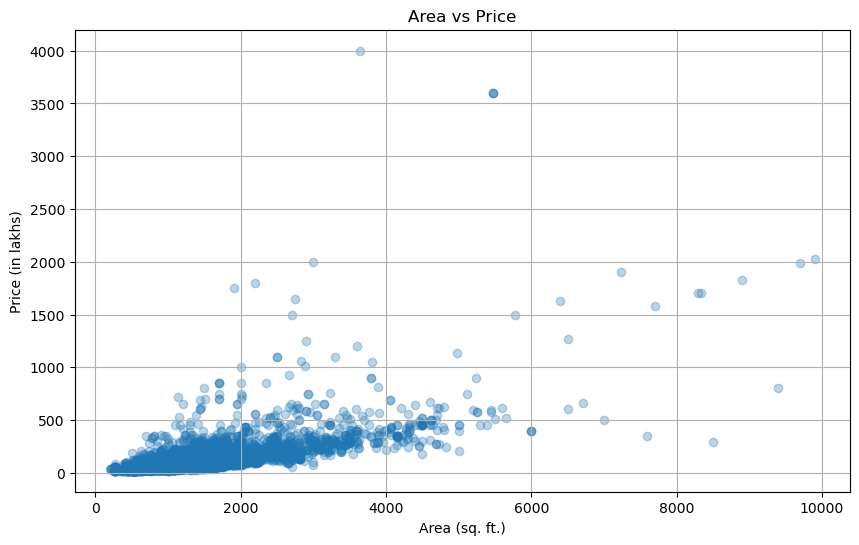

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], alpha=0.3)
plt.title('Area vs Price')
plt.xlabel('Area (sq. ft.)')
plt.ylabel('Price (in lakhs)')
plt.grid(True)
plt.show()


In [11]:
df['City'].unique()


array(['Banglore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai'],
      dtype=object)

In [12]:
# Group by city and calculate average price
avg_price_per_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)

# Show the top 10 cities by average price
print(avg_price_per_city)


City
Mumbai       158.654777
Delhi        102.755762
Banglore     102.191668
Hyderabad    101.144758
Chennai       83.790854
Kolkata       66.210293
Name: Price, dtype: float64


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['City_encoded'] = le.fit_transform(df['City'])

# Now compute correlation
correlation = df['City_encoded'].corr(df['Price'])
print(f"Correlation between City and Price: {correlation:.4f}")


Correlation between City and Price: 0.1207


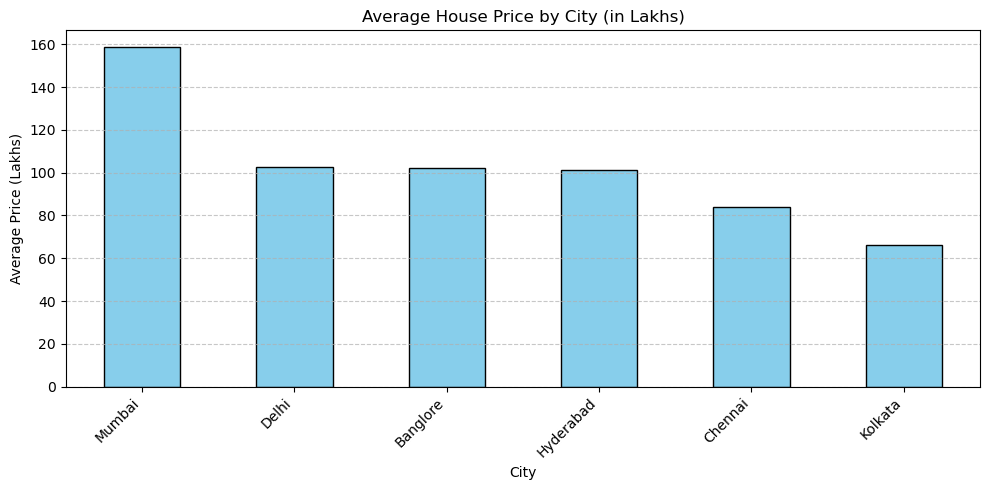

In [14]:
plt.figure(figsize=(10, 5))
avg_price_per_city.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average House Price by City (in Lakhs)')
plt.ylabel('Average Price (Lakhs)')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
df['Location'].nunique()


741

In [16]:
import pandas as pd

# Group by both Location and City, then calculate average price
avg_price_by_loc_city = df.groupby(['City', 'Location'])['Price'].mean().reset_index()

# Sort by average price in descending order
top_10_locations = avg_price_by_loc_city.sort_values(by='Price', ascending=False).head(10)

# Display the result of top 10 expensive location
print(top_10_locations)


         City       Location    Price
736    Mumbai      juhu tara  1800.00
624    Mumbai    Lower Parel  1729.25
712    Mumbai         Tardeo  1350.00
626    Mumbai      Mahalaxmi  1125.00
733    Mumbai          Worli  1102.50
301     Delhi       West End  1100.00
655    Mumbai    Peddar Road  1000.00
216     Delhi    DLF Phase 5   892.50
77   Banglore  Richmond Town   887.00
570    Mumbai     Dadar East   850.00


In [17]:
# Sort by average price in descending order
top_10_locations = avg_price_by_loc_city.sort_values(by='Price').head(10)

# Display the result of top 10 affordable location
print(top_10_locations)


        City          Location      Price
724   Mumbai            Vasind  20.000000
578   Mumbai         Dombivali  20.180000
551   Mumbai          Asangaon  20.350000
744   Mumbai      ulhasnagar 4  20.500000
552   Mumbai          Badlapur  20.616667
648   Mumbai           Palghar  21.000000
698   Mumbai  Sector-26 Taloja  21.000000
720   Mumbai           Vangani  21.000000
533  Kolkata        Santoshpur  21.000000
516  Kolkata        Bhadreswar  21.870000


In [18]:
df['Resale'].unique()  


array([0, 1], dtype=int64)

In [19]:
# Count the number of houses which are or are not resale
Resale_counts = df['Resale'].value_counts()

# Display the result
print(Resale_counts)


Resale
0    6083
1    3307
Name: count, dtype: int64


In [20]:
correlation = df['Resale'].corr(df['Price'])
print(f"Correlation between Resale status and Price: {correlation:.4f}")

Correlation between Resale status and Price: 0.1238


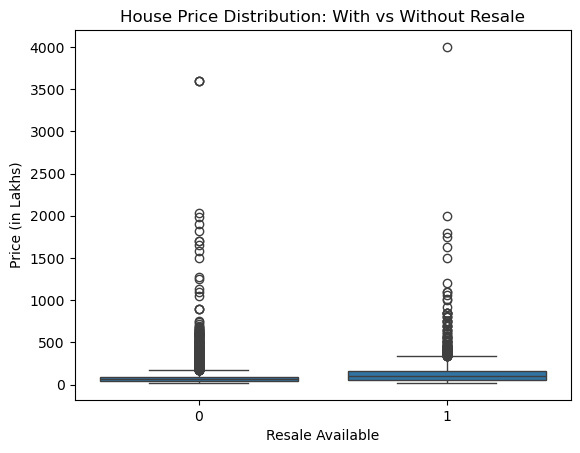

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Resale', y='Price', data=df)
plt.title('House Price Distribution: With vs Without Resale')
plt.xlabel('Resale Available')
plt.ylabel('Price (in Lakhs)')
plt.show()


In [22]:
df['Wifi'].unique()  


array([0., 1.])

In [23]:
# Count the number of houses with and without WiFi
wifi_counts = df['Wifi'].value_counts()

# Display the result
print(wifi_counts)


Wifi
0.0    9197
1.0     193
Name: count, dtype: int64


In [24]:
wifi_price_comparison = df.groupby('Wifi')['Price'].mean()
print(wifi_price_comparison)


Wifi
0.0    104.499561
1.0    158.747565
Name: Price, dtype: float64


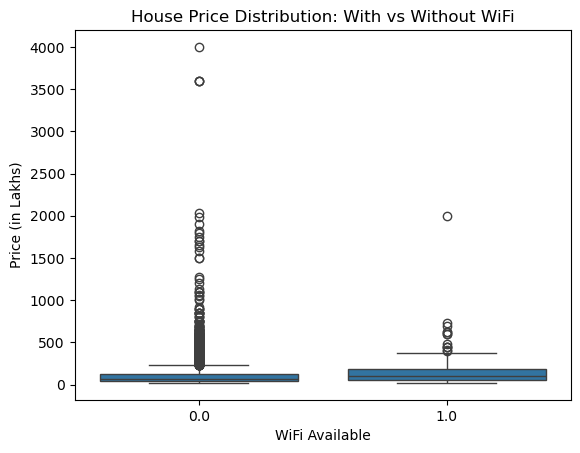

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Wifi', y='Price', data=df)
plt.title('House Price Distribution: With vs Without WiFi')
plt.xlabel('WiFi Available')
plt.ylabel('Price (in Lakhs)')
plt.show()


In [26]:
print("Latitude correlation:", df['Latitude'].corr(df['Price']))
print("Longitude correlation:", df['Longitude'].corr(df['Price']))


Latitude correlation: 0.03424391011271827
Longitude correlation: -0.007957134535431093


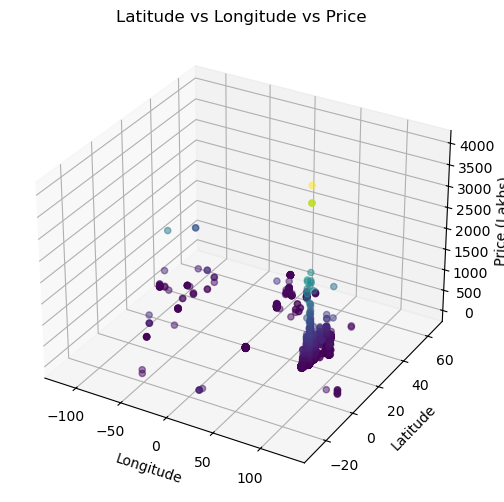

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Longitude'], df['Latitude'], df['Price'], c=df['Price'], cmap='viridis', alpha=0.5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price (Lakhs)')
plt.title('Latitude vs Longitude vs Price')
plt.show()


In [28]:
df['AC'].unique()  

array([0., 1.])

In [29]:
# Count the number of houses with and without WiFi
AC_counts = df['AC'].value_counts()

# Display the result
print(AC_counts)


AC
0.0    8792
1.0     598
Name: count, dtype: int64


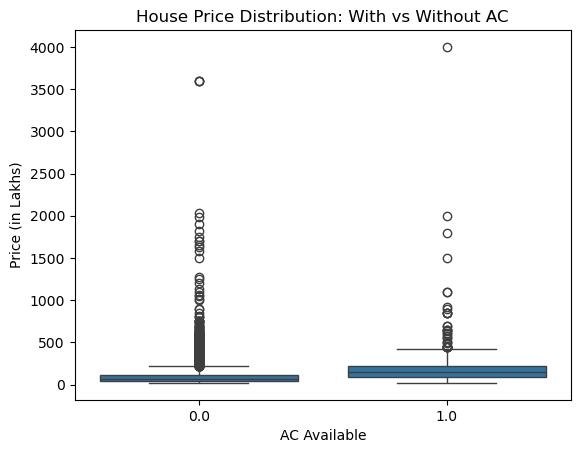

In [30]:
sns.boxplot(x='AC', y='Price', data=df)
plt.title('House Price Distribution: With vs Without AC')
plt.xlabel('AC Available')
plt.ylabel('Price (in Lakhs)')
plt.show()


In [31]:
df['No. of Bedrooms'].unique()  

array([4., 3., 2., 1., 5., 8., 6.])

In [32]:
# Count the number of Bedrooms
bedroom_counts = df['No. of Bedrooms'].value_counts()

# Display the result
print(bedroom_counts)


No. of Bedrooms
2.0    4063
3.0    3909
1.0     791
4.0     574
5.0      47
6.0       4
8.0       2
Name: count, dtype: int64


In [33]:
correlation = df['No. of Bedrooms'].corr(df['Price'])
print(f"Correlation between Bedrooms and Price: {correlation:.4f}")


Correlation between Bedrooms and Price: 0.4400


In [34]:
avg_price_bedrooms = df.groupby('No. of Bedrooms')['Price'].mean()
print(avg_price_bedrooms)


No. of Bedrooms
1.0     48.359406
2.0     65.298624
3.0    122.179286
4.0    292.235749
5.0    850.382979
6.0    425.000000
8.0    575.000000
Name: Price, dtype: float64


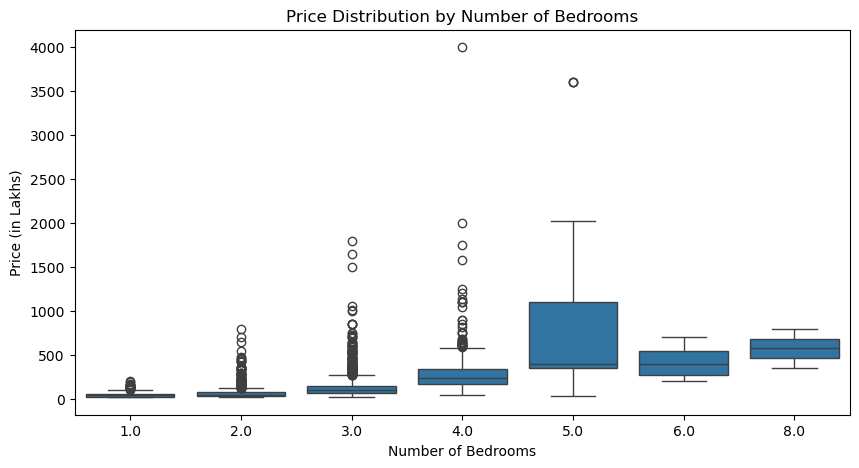

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='No. of Bedrooms', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price (in Lakhs)')
plt.show()

In [36]:
df['School'].unique()  

array([0., 1.])

In [37]:
# Count the availiabiity
school_counts = df['School'].value_counts()

# Display the result
print(school_counts)


School
0.0    8729
1.0     661
Name: count, dtype: int64


In [38]:
correlation = df['School'].corr(df['Price'])
print(f"Correlation between School and Price: {correlation:.4f}")

Correlation between School and Price: 0.0231


In [39]:
avg_price_school = df.groupby('School')['Price'].mean()
print(avg_price_school)


School
0.0    104.726602
1.0    117.340756
Name: Price, dtype: float64


In [40]:
df['SwimmingPool'].unique()  

array([1., 0.])

In [41]:
# Count the availiabiity
pool_counts = df['SwimmingPool'].value_counts()

# Display the result
print(pool_counts)


SwimmingPool
0.0    5581
1.0    3809
Name: count, dtype: int64


In [42]:
correlation = df['SwimmingPool'].corr(df['Price'])
print(f"Correlation between Pool and Price: {correlation:.4f}")

Correlation between Pool and Price: 0.1603


In [43]:
avg_price_school = df.groupby('SwimmingPool')['Price'].mean()
print(avg_price_school)


SwimmingPool
0.0     87.125456
1.0    132.705061
Name: Price, dtype: float64


In [44]:
# Count the availiabiity
lift_counts = df['LiftAvailable'].value_counts()

# Display the result
print(lift_counts)


LiftAvailable
1.0    6757
0.0    2633
Name: count, dtype: int64


In [45]:
correlation = df['LiftAvailable'].corr(df['Price'])
print(f"Correlation between lift and Price: {correlation:.4f}")

Correlation between lift and Price: 0.0704


In [46]:
# Count the availiabiity
car_counts = df['CarParking'].value_counts()

# Display the result
print(car_counts)


CarParking
0.0    5009
1.0    4381
Name: count, dtype: int64


In [47]:
correlation = df['CarParking'].corr(df['Price'])
print(f"Correlation between parking and Price: {correlation:.4f}")

Correlation between parking and Price: 0.1468


In [48]:
# Count the availiabiity
car_counts = df['MaintenanceStaff'].value_counts()

# Display the result
print(car_counts)


MaintenanceStaff
0.0    7777
1.0    1613
Name: count, dtype: int64


In [49]:
correlation = df['MaintenanceStaff'].corr(df['Price'])
print(f"Correlation between MaintenanceStaff and Price: {correlation:.4f}")

Correlation between MaintenanceStaff and Price: 0.0902


In [50]:
df['VaastuCompliant'].unique()  

array([0., 1.])

In [51]:
# Count the availiabiity
v_counts = df['VaastuCompliant'].value_counts()

# Display the result
print(v_counts)


VaastuCompliant
0.0    6609
1.0    2781
Name: count, dtype: int64


In [52]:
# Count the availiabiity
s_counts = df['24X7Security'].value_counts()

# Display the result
print(s_counts)


24X7Security
0.0    5212
1.0    4178
Name: count, dtype: int64


In [53]:
correlation = df['24X7Security'].corr(df['Price'])
print(f"Correlation between 24X7Security and Price: {correlation:.4f}")

Correlation between 24X7Security and Price: 0.1500


In [54]:
# Count the availiabiity
v_counts = df['Gymnasium'].value_counts()

# Display the result
print(v_counts)


Gymnasium
1.0    4788
0.0    4602
Name: count, dtype: int64


In [55]:
correlation = df['Gymnasium'].corr(df['Price'])
print(f"Correlation between Gymnasium and Price: {correlation:.4f}")

Correlation between Gymnasium and Price: 0.1442


In [56]:
# Count the availiabiity
v_counts = df['PowerBackup'].value_counts()

# Display the result
print(v_counts)


PowerBackup
1.0    6114
0.0    3276
Name: count, dtype: int64


In [57]:
correlation = df['PowerBackup'].corr(df['Price'])
print(f"Correlation between PowerBackup and Price: {correlation:.4f}")

Correlation between PowerBackup and Price: 0.1591


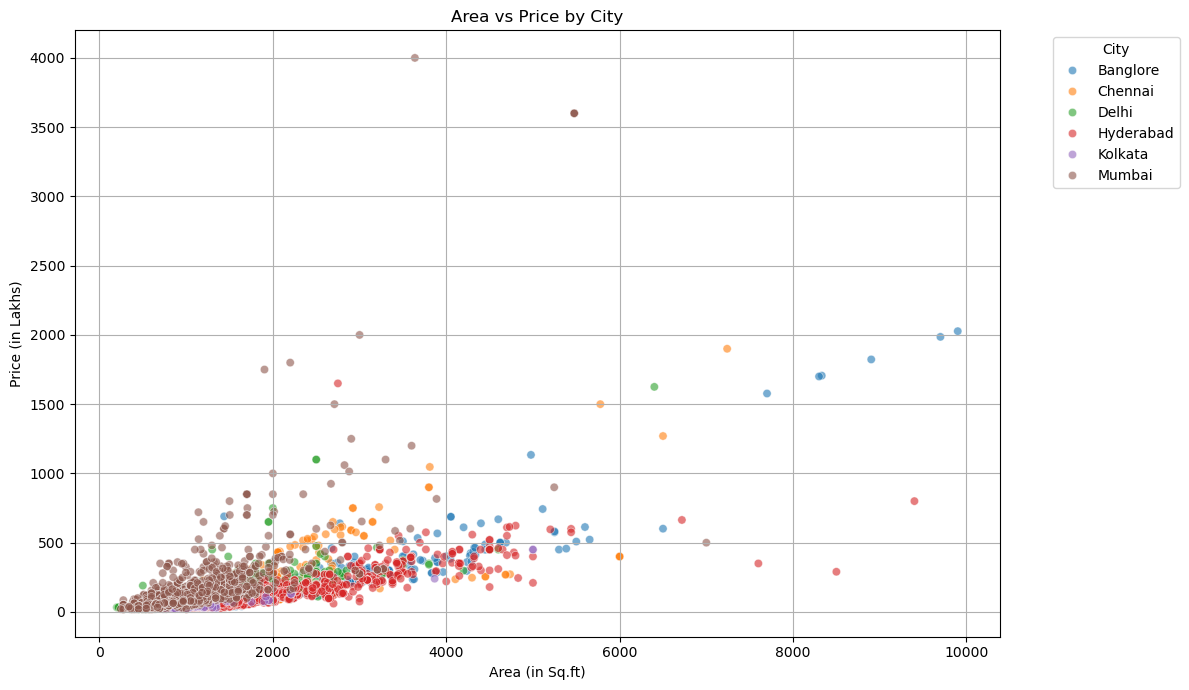

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Area', y='Price', hue='City', alpha=0.6, palette='tab10')

plt.title('Area vs Price by City')
plt.xlabel('Area (in Sq.ft)')
plt.ylabel('Price (in Lakhs)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


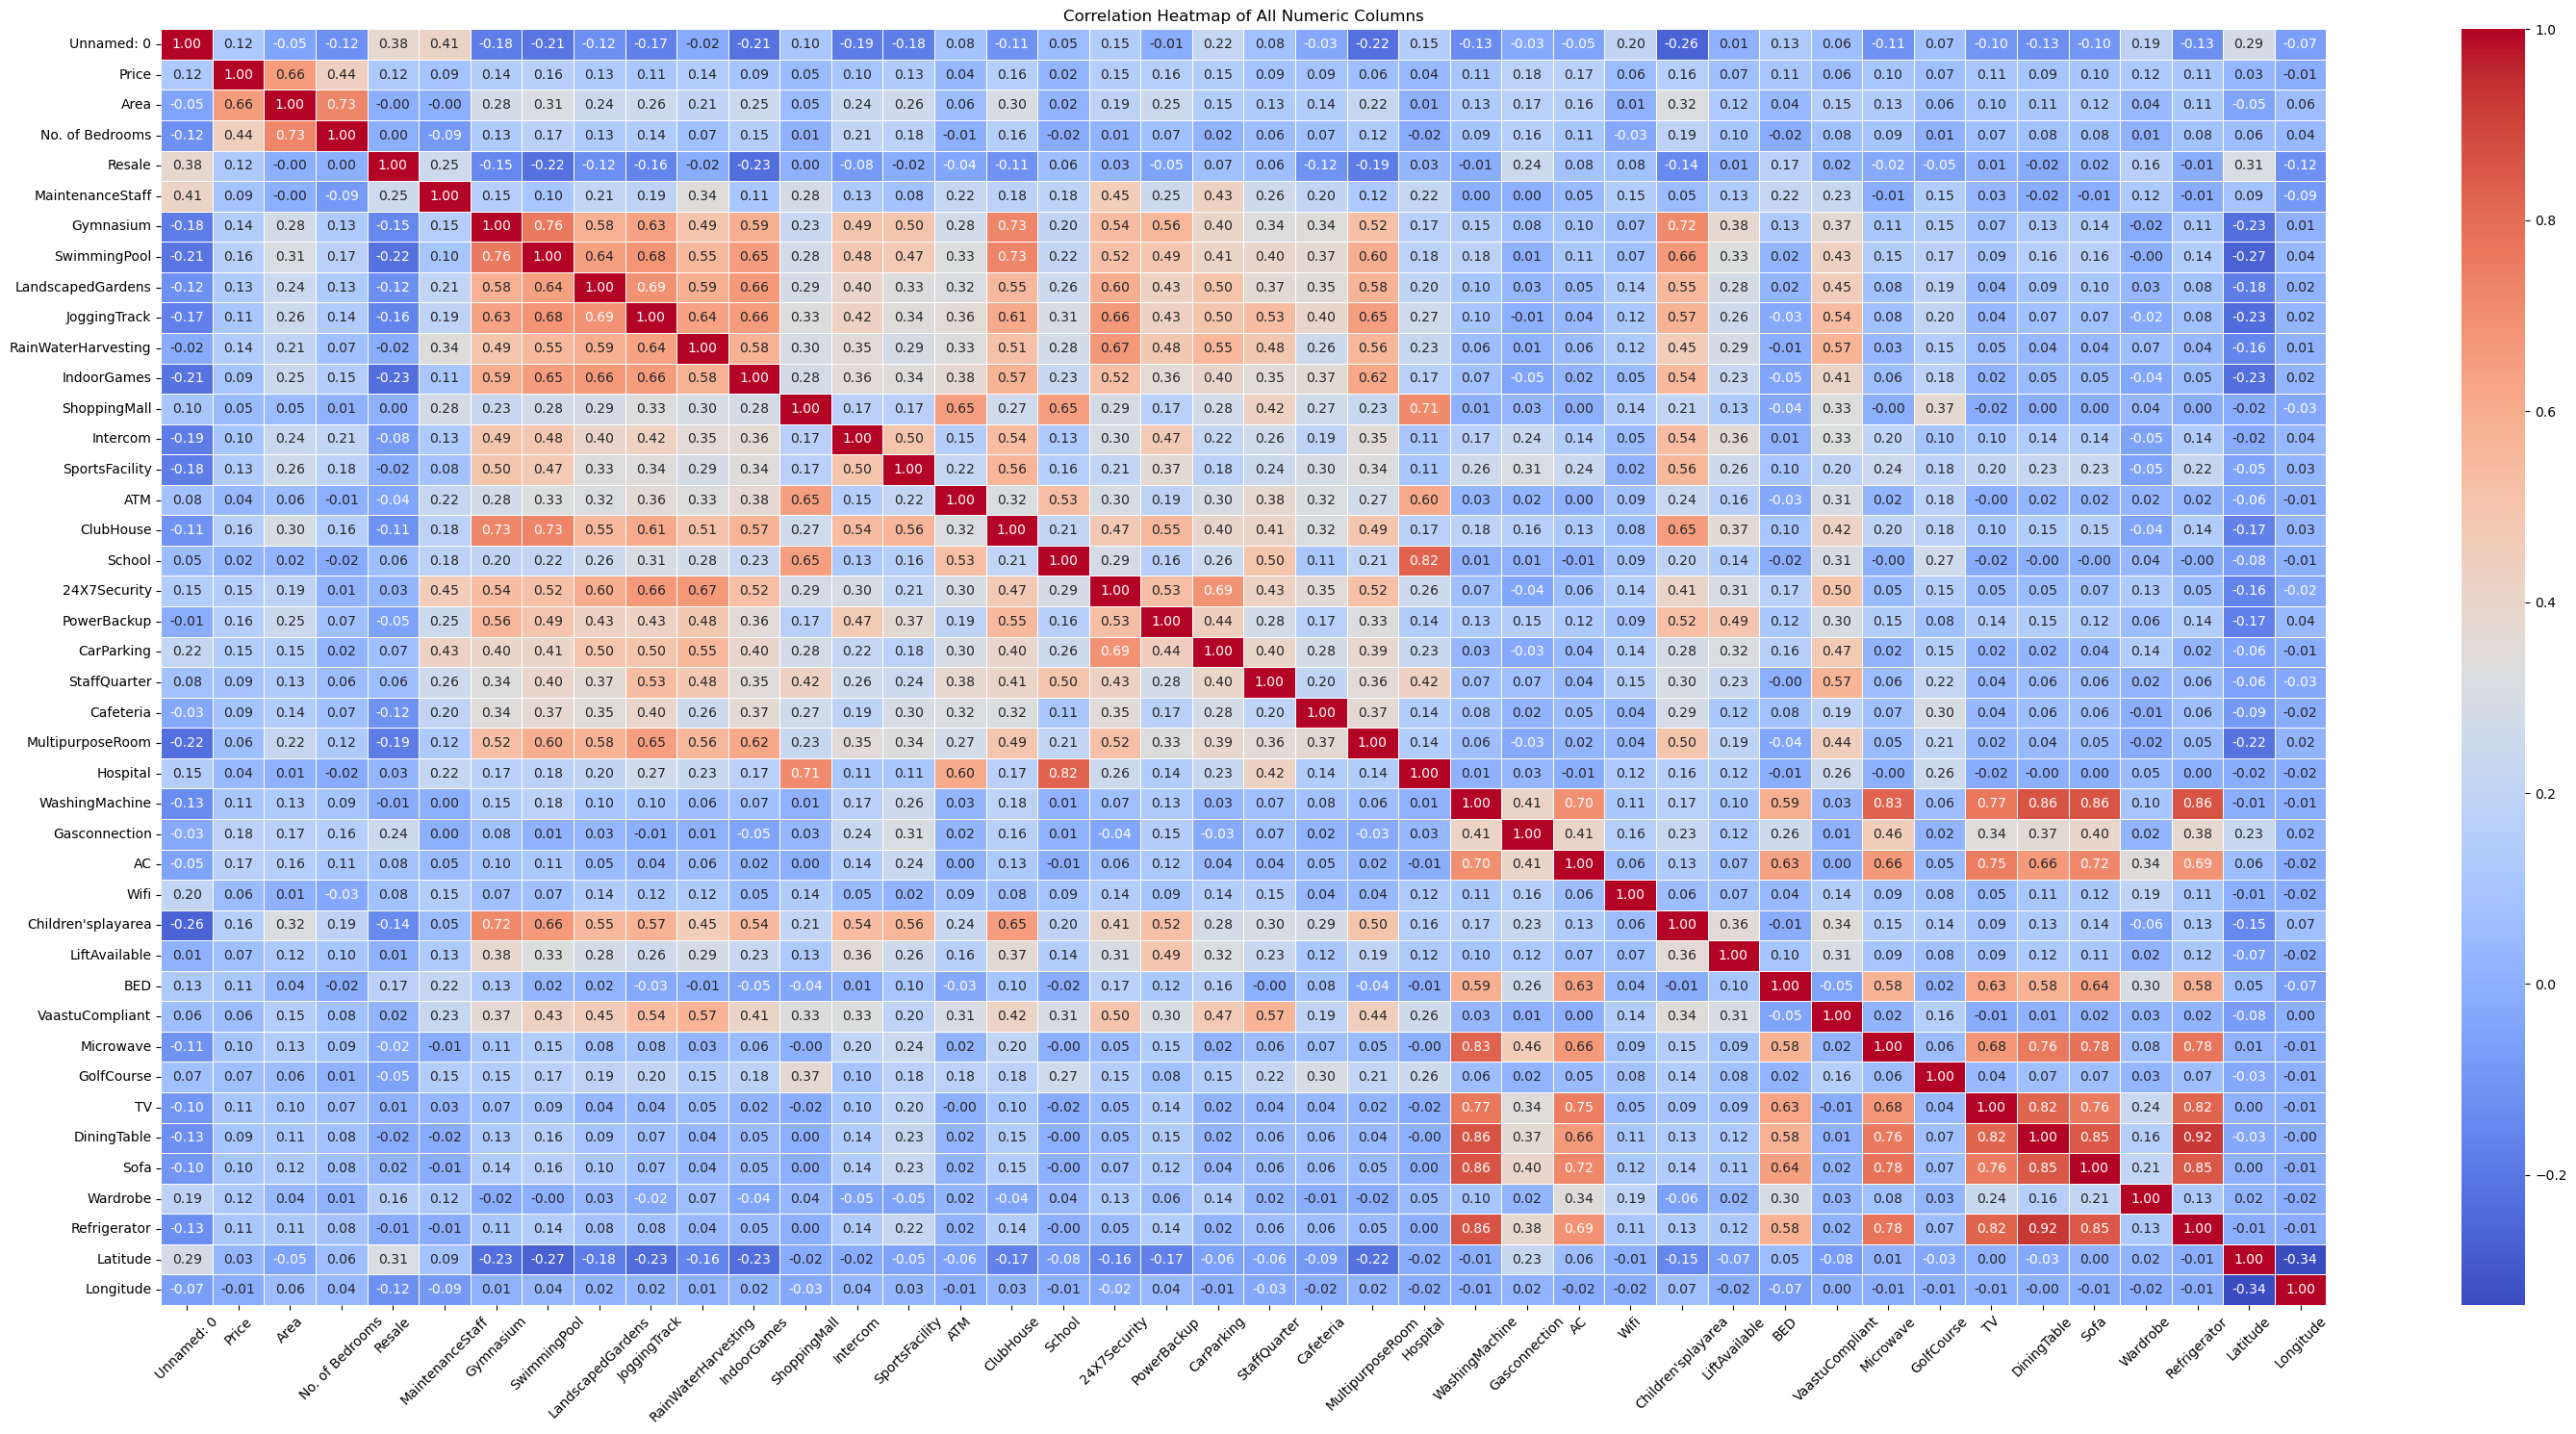

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of All Numeric Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [60]:
# Drop non-numeric columns if they sneak into the DataFrame
numeric_df = df.drop(columns=['City', 'locality'], errors='ignore').select_dtypes(include=['int64', 'float64'])

# Get top 5 correlated features with Price
top_corr = numeric_df.corr()['Price'].drop('Price').abs().sort_values(ascending=False).head(5)
print(top_corr)


Area               0.657287
No. of Bedrooms    0.440034
Gasconnection      0.178626
AC                 0.168987
SwimmingPool       0.160253
Name: Price, dtype: float64


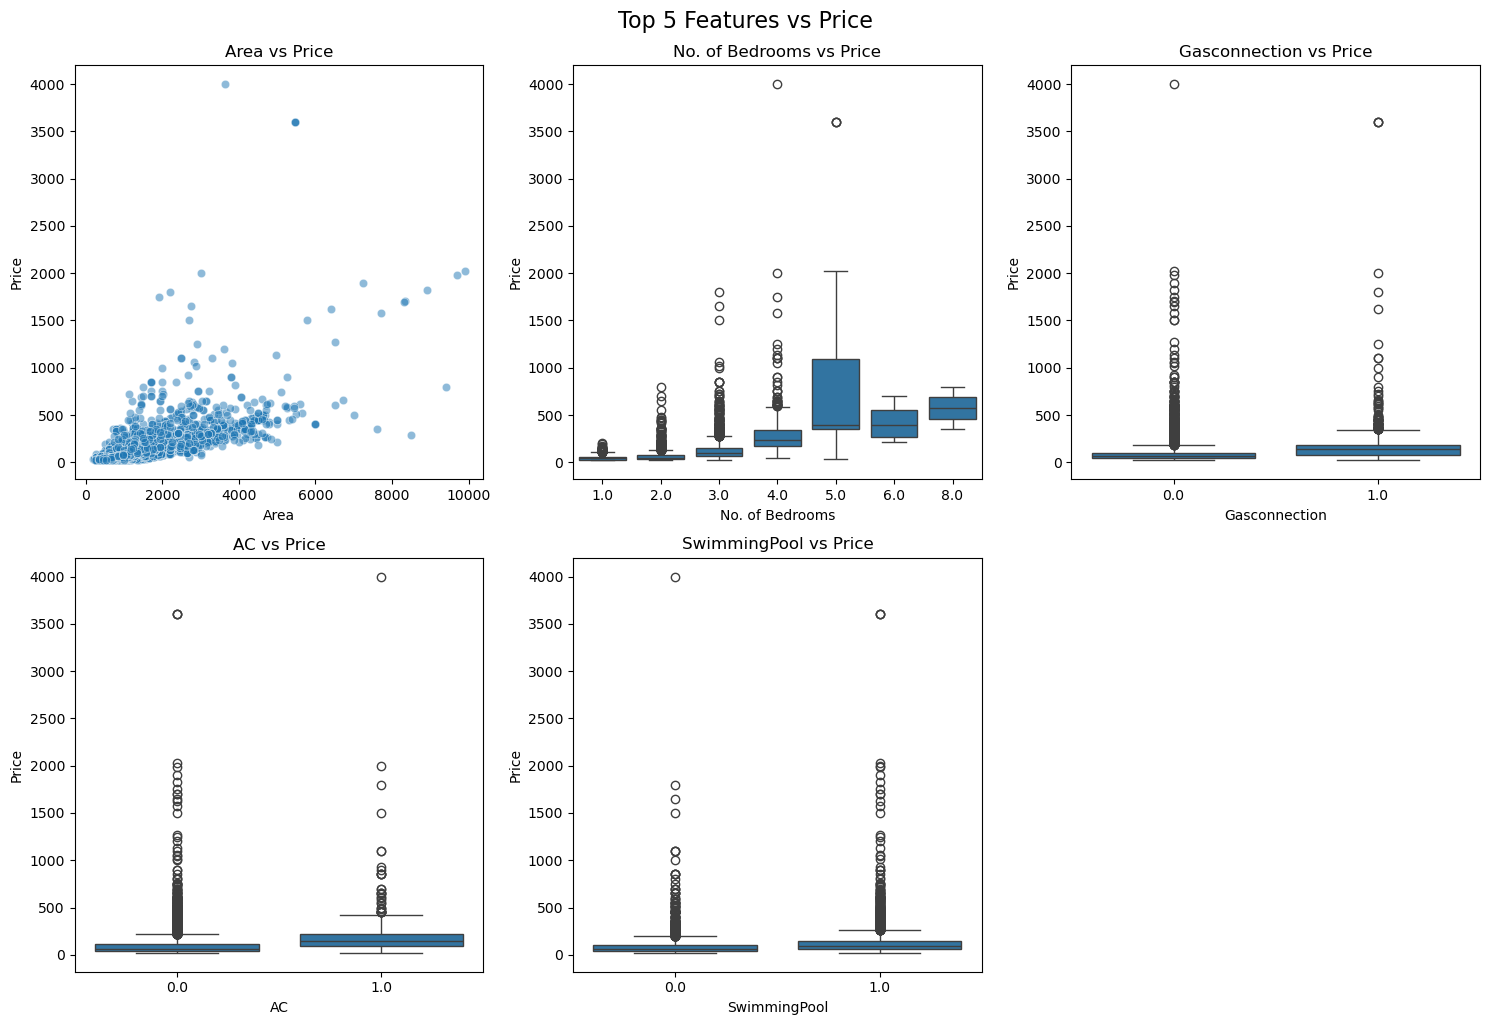

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

top_features = top_corr.index.tolist()

plt.figure(figsize=(15, 10))

for i, feature in enumerate(top_features):
    plt.subplot(2, 3, i + 1)
    
    if df[feature].nunique() <= 10:  # For categorical/binary features
        sns.boxplot(x=feature, y='Price', data=df)
    else:
        sns.scatterplot(x=feature, y='Price', data=df, alpha=0.5)
        
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.suptitle('Top 5 Features vs Price', fontsize=16, y=1.02)
plt.show()


In [62]:
# Get top 10 correlated features with Price
top_corr = numeric_df.corr()['Price'].drop('Price').abs().sort_values(ascending=False).head(10)
print(top_corr)

Area                  0.657287
No. of Bedrooms       0.440034
Gasconnection         0.178626
AC                    0.168987
SwimmingPool          0.160253
PowerBackup           0.159062
ClubHouse             0.158513
Children'splayarea    0.157341
24X7Security          0.150050
CarParking            0.146754
Name: Price, dtype: float64


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time


# Select only the specified features
features = [
    'Area', 'No. of Bedrooms', 'Gasconnection', 'AC', 'SwimmingPool',
    'PowerBackup', 'ClubHouse', "Children'splayarea", '24X7Security', 
    'CarParking', 'Location', 'City'
]
target = 'Price'

# Clean data - drop rows with missing values in selected features
df = df.dropna(subset=features + [target])

# Separate features and target
X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing setup
numeric_features = ['Area', 'No. of Bedrooms']
binary_features = [
    'Gasconnection', 'AC', 'SwimmingPool', 'PowerBackup',
    'ClubHouse', "Children'splayarea", '24X7Security', 'CarParking'
]
categorical_features = ['Location', 'City']

# Preprocessor - minimal transformations for speed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),  # Binary features don't need scaling
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)

In [64]:
# Ridge Regression Pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

# Train and evaluate
start_time = time.time()
ridge_pipeline.fit(X_train, y_train)
ridge_time = time.time() - start_time
ridge_pred = ridge_pipeline.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("Ridge Regression Evaluation:")
print(f"R2 Score: {ridge_r2:.4f}")
print(f"RMSE: {ridge_rmse:.2f} lakhs")
print(f"Training Time: {ridge_time:.2f} seconds")

Ridge Regression Evaluation:
R2 Score: 0.6760
RMSE: 79.70 lakhs
Training Time: 0.08 seconds


In [65]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=50, 
        max_depth=10, 
        random_state=42,
        n_jobs=-1
    ))
])

# Train and evaluate
start_time = time.time()
rf_pipeline.fit(X_train, y_train)
rf_time = time.time() - start_time
rf_pred = rf_pipeline.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print("\nRandom Forest Evaluation:")
print(f"R2 Score: {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.2f} lakhs")
print(f"Training Time: {rf_time:.2f} seconds")


Random Forest Evaluation:
R2 Score: 0.6949
RMSE: 77.34 lakhs
Training Time: 1.03 seconds


In [66]:
# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    ))
])

# Train and evaluate
start_time = time.time()
xgb_pipeline.fit(X_train, y_train)
xgb_time = time.time() - start_time
xgb_pred = xgb_pipeline.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("\nXGBoost Evaluation:")
print(f"R2 Score: {xgb_r2:.4f}")
print(f"RMSE: {xgb_rmse:.2f} lakhs")
print(f"Training Time: {xgb_time:.2f} seconds")


XGBoost Evaluation:
R2 Score: 0.6680
RMSE: 80.68 lakhs
Training Time: 0.15 seconds


In [70]:
# Train the pipeline
start = time.time()
lgbm_pipeline.fit(X_train, y_train)
lgbm_time = time.time() - start

# Predict
lgbm_preds = lgbm_pipeline.predict(X_test)

# Evaluate
lgbm_r2 = r2_score(y_test, lgbm_preds)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_preds)) / 1e5  # converting to lakhs

# Print evaluation
print("\nLightGBM Evaluation:")
print(f"R2 Score: {lgbm_r2:.4f}")
print(f"RMSE: {lgbm_rmse:.2f} lakhs")
print(f"Training Time: {lgbm_time:.2f} seconds")



LightGBM Evaluation:
R2 Score: 0.7257
RMSE: 0.00 lakhs
Training Time: 0.12 seconds


In [74]:
df['Price_per_SqFt'] = df['Price'] / df['Area']
df['Bedroom_to_Area_Ratio'] = df['No. of Bedrooms'] / df['Area']
df['Security_And_Parking'] = df['24X7Security'] * df['CarParking']
df['Area_Bins'] = pd.cut(df['Area'], bins=5, labels=['Small', 'Medium', 'Large', 'XL', 'XXL'])

# Feature lists
numeric_features = ['Area', 'No. of Bedrooms', 'Price_per_SqFt', 'Bedroom_to_Area_Ratio']
binary_features = ['Gasconnection', 'AC', 'SwimmingPool', 'PowerBackup',
                  'ClubHouse', "Children'splayarea", '24X7Security', 'CarParking', 'Security_And_Parking']
categorical_features = ['Location', 'City', 'Area_Bins']

# Final feature set
features_final = numeric_features + binary_features + categorical_features
X = df[features_final]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard preprocessor (OneHot encoding)
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Target encoding preprocessor
preprocessor_te = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', TargetEncoder(target_type='continuous'), categorical_features)
    ])

models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

for name, model in models.items():
    pipeline = Pipeline([('preprocessor', preprocessor_std), ('model', model)])
    start = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start
    y_pred = pipeline.predict(X_test)
    print(f"\n{name}:")
    print(f"R2: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} lakhs")
    print(f"Training Time: {train_time:.2f}s")
 


Ridge:
R2: 0.8575
RMSE: 52.85 lakhs
Training Time: 0.17s

RandomForest:
R2: 0.9316
RMSE: 36.63 lakhs
Training Time: 2.32s

XGBoost:
R2: 0.9733
RMSE: 22.86 lakhs
Training Time: 0.47s

LightGBM:
R2: 0.9718
RMSE: 23.50 lakhs
Training Time: 0.17s


In [80]:
models = {
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

for name, model in models.items():
    pipeline = Pipeline([('preprocessor', preprocessor_std), ('model', model)])
    start = time.time()
    pipeline.fit(X_train, y_train)
    train_time = time.time() - start
    
    # Predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    print(f"\n{name}:")
    print(f"Training R2: {train_r2:.4f} | Test R2: {test_r2:.4f} | Difference: {train_r2-test_r2:.4f}")
    print(f"Training RMSE: {train_rmse:.2f} lakhs | Test RMSE: {test_rmse:.2f} lakhs | Difference: {train_rmse-test_rmse:.2f}")
    print(f"Training Time: {train_time:.2f}s")
    
    # Overfitting warning
    if train_r2 - test_r2 > 0.1:  # Threshold can be adjusted
        print("⚠️ WARNING: Potential overfitting (large gap between train and test R2)")
    if train_rmse - test_rmse < -0.5:  # Threshold can be adjusted
        print("⚠️ WARNING: Potential overfitting (train RMSE much lower than test RMSE)")


Ridge:
Training R2: 0.9000 | Test R2: 0.8575 | Difference: 0.0425
Training RMSE: 44.14 lakhs | Test RMSE: 52.85 lakhs | Difference: -8.71
Training Time: 0.22s
⚠️ WARNING: Potential overfitting (train RMSE much lower than test RMSE)

RandomForest:
Training R2: 0.9956 | Test R2: 0.9316 | Difference: 0.0640
Training RMSE: 9.26 lakhs | Test RMSE: 36.63 lakhs | Difference: -27.37
Training Time: 2.37s
⚠️ WARNING: Potential overfitting (train RMSE much lower than test RMSE)

XGBoost:
Training R2: 0.9996 | Test R2: 0.9733 | Difference: 0.0262
Training RMSE: 2.93 lakhs | Test RMSE: 22.86 lakhs | Difference: -19.94
Training Time: 0.46s
⚠️ WARNING: Potential overfitting (train RMSE much lower than test RMSE)

LightGBM:
Training R2: 0.9162 | Test R2: 0.9718 | Difference: -0.0556
Training RMSE: 40.39 lakhs | Test RMSE: 23.50 lakhs | Difference: 16.89
Training Time: 0.16s


In [ ]:
# THUS LIGHTGBM IA A GOOD MODEL . WE WILL WORK ON IT 

In [84]:
import joblib
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test set
y_pred_lgbm = lgbm_pipeline.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred_lgbm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

# Print results
print("\n🔍 LightGBM Model Evaluation:")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f} lakhs")


# Save the pipeline
joblib.dump(lgbm_pipeline, 'lightgbm_model.pkl')
print("LightGBM model saved successfully as 'lightgbm_model.pkl'")



🔍 LightGBM Model Evaluation:
R2 Score: 0.9718
RMSE: 23.50 lakhs
LightGBM model saved successfully as 'lightgbm_model.pkl'
